In [1]:
# Install Kaggle API
!pip install kaggle


In [2]:
# Upload Kaggle API token
from google.colab import files
uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [3]:
# Move the uploaded Kaggle API token to the appropriate location and set permissions
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:

# Download the dataset from Kaggle
!kaggle datasets download -d prashant268/chest-xray-covid19-pneumonia


Dataset URL: https://www.kaggle.com/datasets/prashant268/chest-xray-covid19-pneumonia
License(s): unknown
100% 2.06G/2.06G [00:16<00:00, 158MB/s]
100% 2.06G/2.06G [00:16<00:00, 130MB/s]


In [5]:
# Unzip the downloaded dataset
import zipfile
with zipfile.ZipFile('/content/chest-xray-covid19-pneumonia.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')


In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3  # Import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
import os
import random
import numpy as np
import matplotlib.pyplot as plt


In [7]:
# Check for GPU
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU device not found')
else:
    print('Found GPU at: {}'.format(device_name))


Found GPU at: /device:GPU:0


In [8]:
# Define the hyperparameters
batch_size = 32
num_classes = 3  # Update to the number of classes
num_epochs = 10
learning_rate = 0.001
image_size = (224, 224)


In [9]:
# Define the class names and labels
class_names = ['PNEUMONIA', 'COVID19', 'NORMAL']
class_labels = {name: i for i, name in enumerate(class_names)}


In [10]:
# Define the data paths
data_dir = '/content/dataset/Data/'
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')


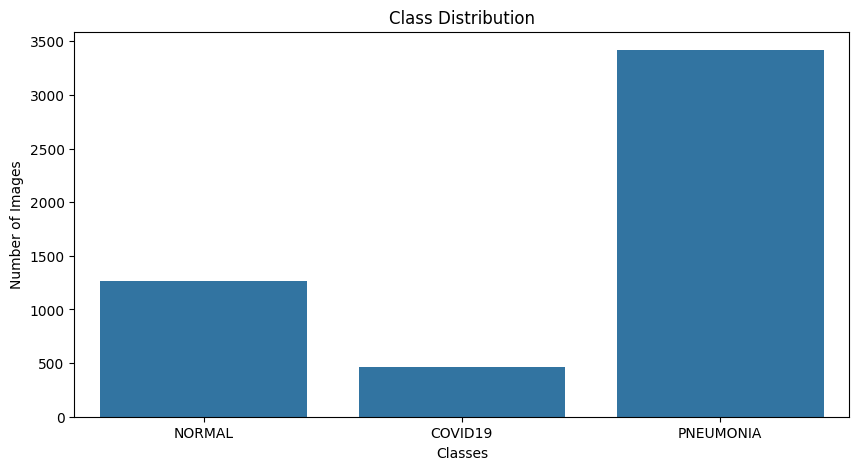

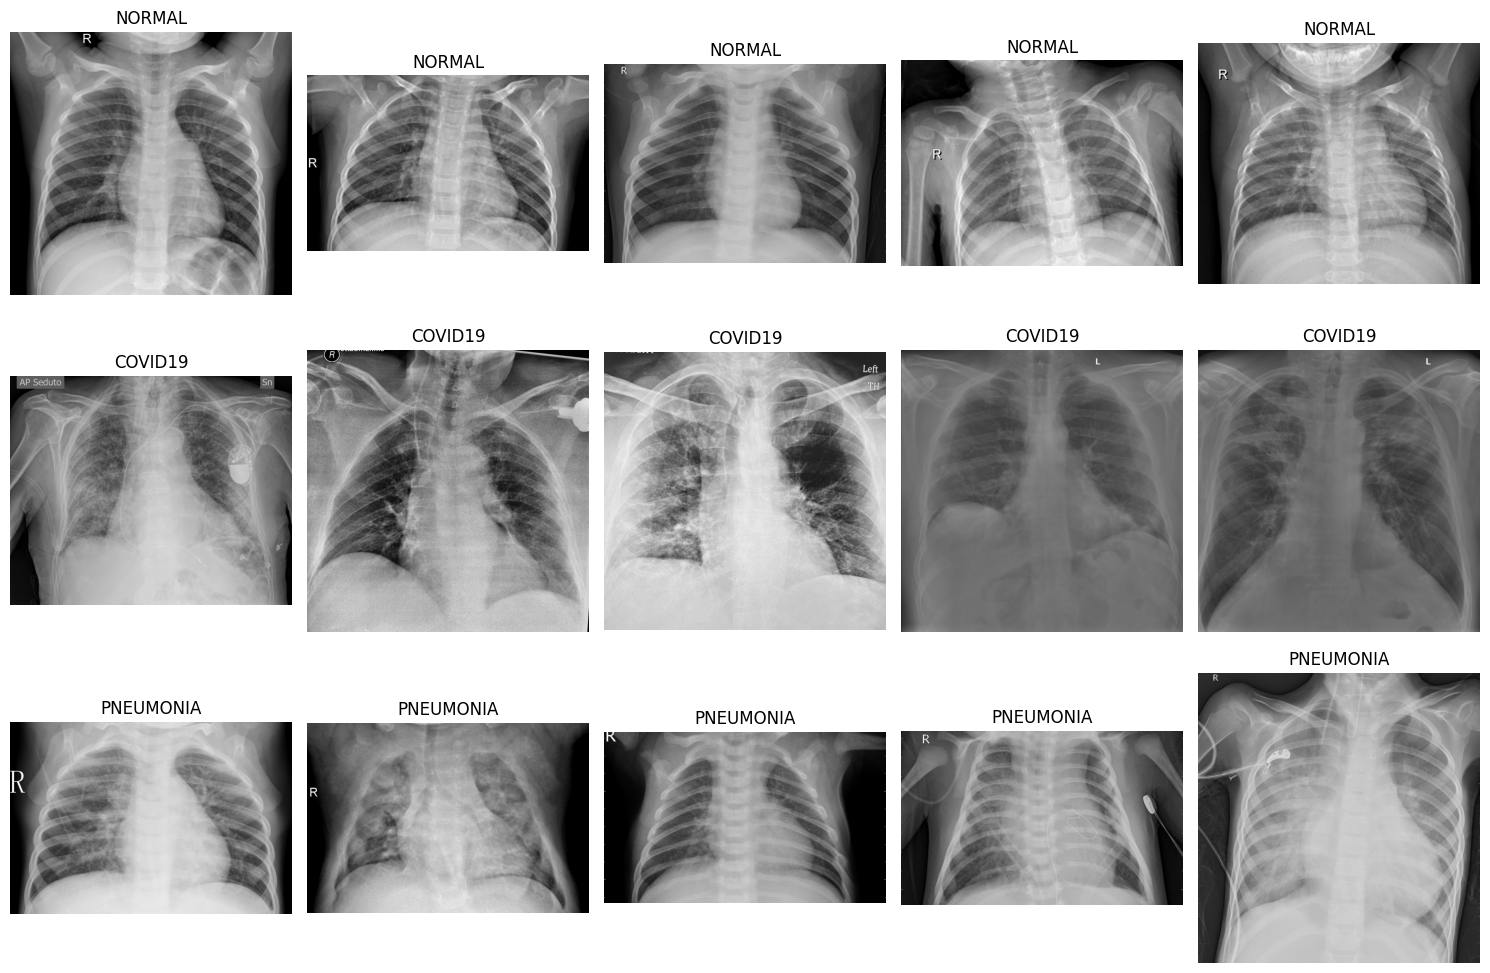

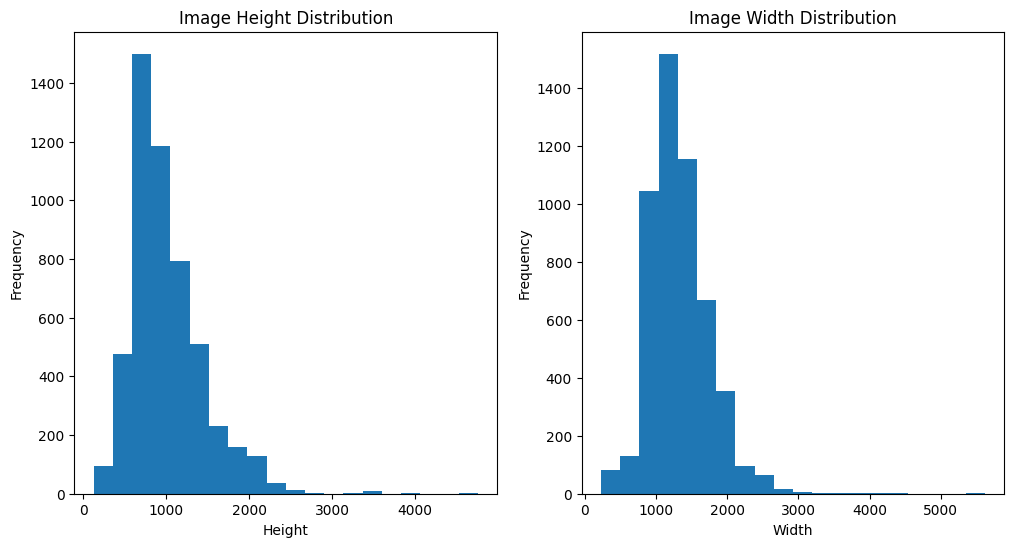

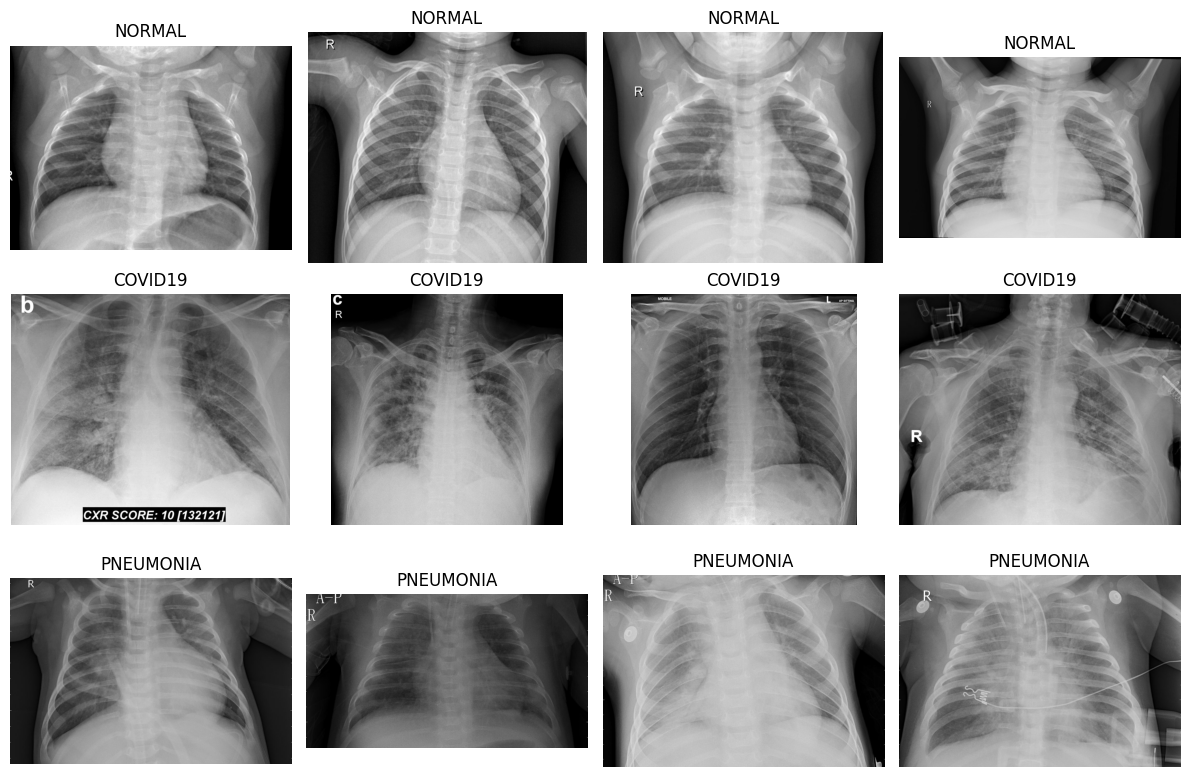

In [34]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot class distribution
def plot_class_distribution(directory):
    classes = os.listdir(directory)
    class_counts = {cls: len(os.listdir(os.path.join(directory, cls))) for cls in classes}
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
    plt.xlabel('Classes')
    plt.ylabel('Number of Images')
    plt.title('Class Distribution')
    plt.show()

# Function to plot sample images
def plot_sample_images(directory, num_samples=5):
    classes = os.listdir(directory)
    plt.figure(figsize=(15, 10))
    for cls in classes:
        img_paths = [os.path.join(directory, cls, img) for img in os.listdir(os.path.join(directory, cls))]
        sample_paths = np.random.choice(img_paths, num_samples, replace=False)
        for i, path in enumerate(sample_paths):
            plt.subplot(len(classes), num_samples, i + 1 + num_samples * classes.index(cls))
            img = cv2.imread(path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.imshow(img)
            plt.title(cls)
            plt.axis('off')
    plt.tight_layout()
    plt.show()

# Function to plot image size distribution
def plot_image_sizes(directory):
    classes = os.listdir(directory)
    img_sizes = []
    for cls in classes:
        img_paths = [os.path.join(directory, cls, img) for img in os.listdir(os.path.join(directory, cls))]
        for path in img_paths:
            img = cv2.imread(path)
            img_sizes.append((img.shape[0], img.shape[1]))  # height, width
    heights, widths = zip(*img_sizes)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(heights, bins=20)
    plt.xlabel('Height')
    plt.ylabel('Frequency')
    plt.title('Image Height Distribution')
    plt.subplot(1, 2, 2)
    plt.hist(widths, bins=20)
    plt.xlabel('Width')
    plt.ylabel('Frequency')
    plt.title('Image Width Distribution')
    plt.show()

# Function to plot image previews
def plot_image_previews(directory, num_samples_per_class=4):
    classes = os.listdir(directory)
    plt.figure(figsize=(12, 8))
    for i, cls in enumerate(classes):
        img_paths = [os.path.join(directory, cls, img) for img in os.listdir(os.path.join(directory, cls))]
        sample_paths = np.random.choice(img_paths, num_samples_per_class, replace=False)
        for j, path in enumerate(sample_paths):
            img = cv2.imread(path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(len(classes), num_samples_per_class, i * num_samples_per_class + j + 1)
            plt.imshow(img)
            plt.title(cls)
            plt.axis('off')
    plt.tight_layout()
    plt.show()

# Plot class distribution
plot_class_distribution(train_dir)

# Plot sample images
plot_sample_images(train_dir)

# Plot image size distribution
plot_image_sizes(train_dir)

# Plot image previews
plot_image_previews(train_dir)


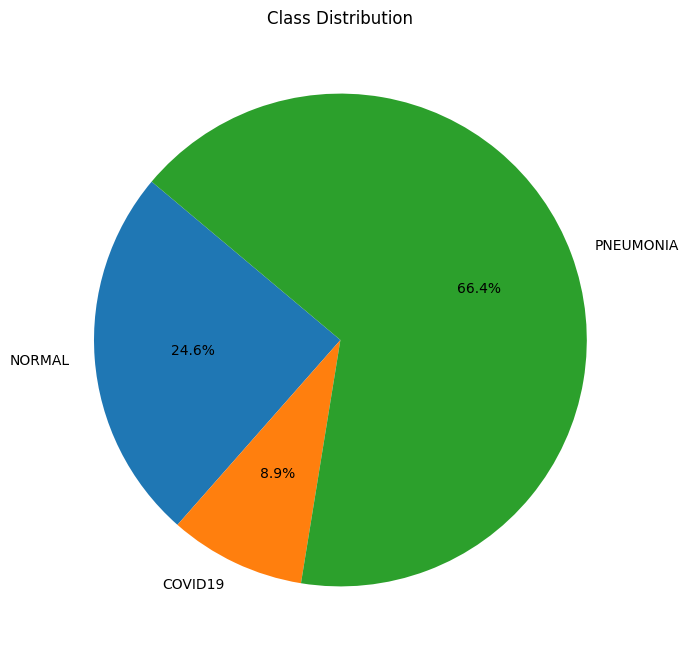

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot class distribution in circular form
def plot_class_distribution_circular(directory):
    classes = os.listdir(directory)
    class_counts = {cls: len(os.listdir(os.path.join(directory, cls))) for cls in classes}
    plt.figure(figsize=(8, 8))
    plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', startangle=140)
    plt.title('Class Distribution')
    plt.show()

# Plot class distribution in circular form for train directory
plot_class_distribution_circular(train_dir)


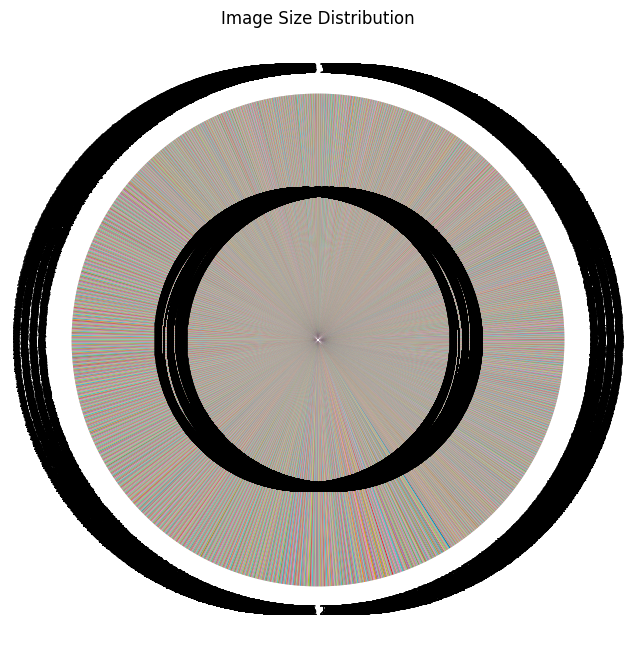

In [36]:
# Function to plot image size distribution in circular form
def plot_image_sizes_circular(directory):
    classes = os.listdir(directory)
    img_sizes = []
    for cls in classes:
        img_paths = [os.path.join(directory, cls, img) for img in os.listdir(os.path.join(directory, cls))]
        for path in img_paths:
            img = cv2.imread(path)
            img_sizes.append((img.shape[0], img.shape[1]))  # height, width
    heights, widths = zip(*img_sizes)
    plt.figure(figsize=(8, 8))
    plt.pie(heights, labels=widths, autopct='%1.1f%%', startangle=140)
    plt.title('Image Size Distribution')
    plt.show()

# Plot image size distribution in circular form for train directory
plot_image_sizes_circular(train_dir)


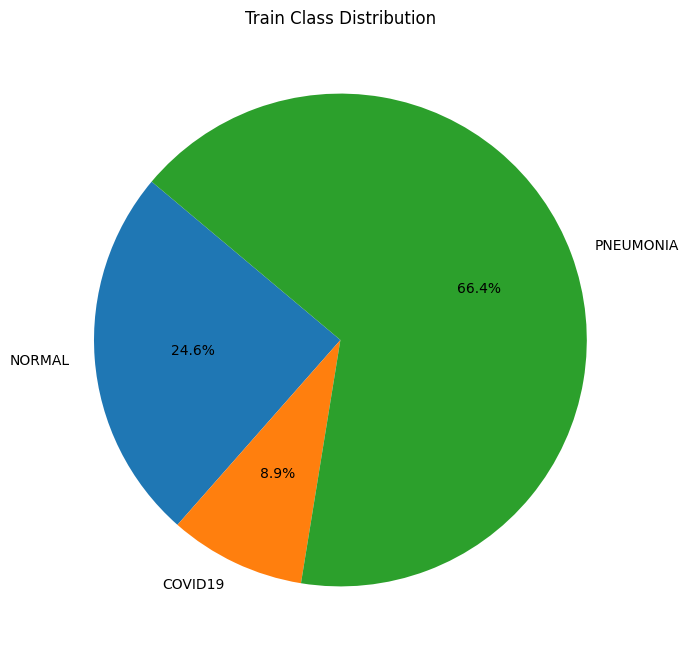

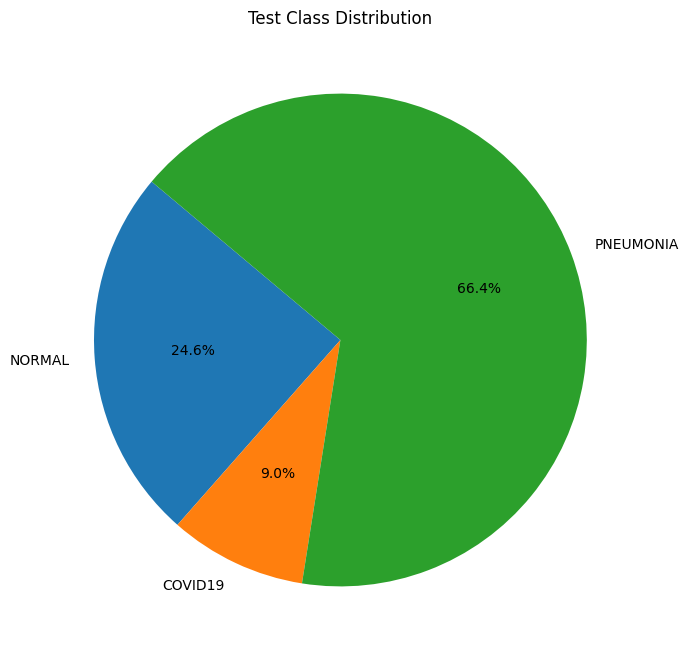

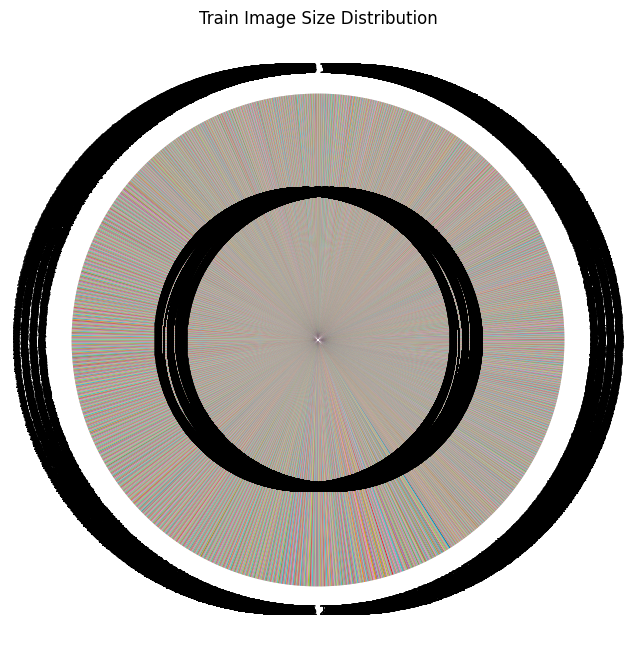

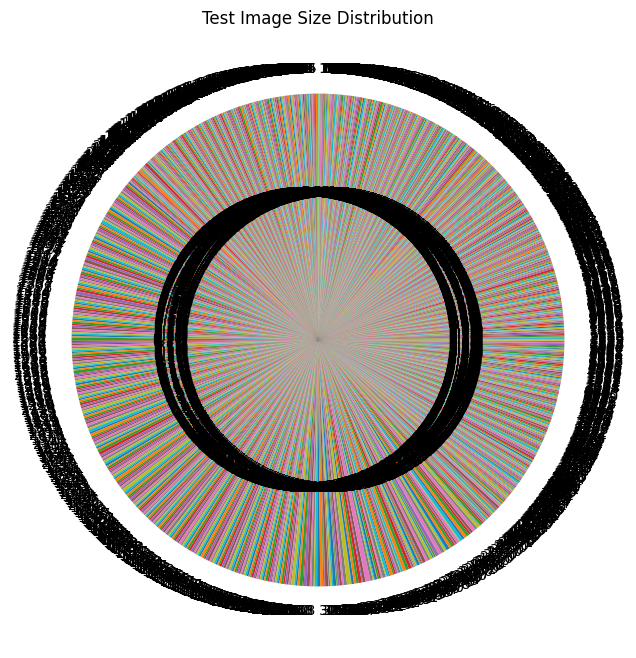

In [37]:
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot class distribution in circular form
def plot_class_distribution_circular(directory, title):
    classes = os.listdir(directory)
    class_counts = {cls: len(os.listdir(os.path.join(directory, cls))) for cls in classes}
    plt.figure(figsize=(8, 8))
    plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.show()

# Function to plot image size distribution in circular form
def plot_image_sizes_circular(directory, title):
    classes = os.listdir(directory)
    img_sizes = []
    for cls in classes:
        img_paths = [os.path.join(directory, cls, img) for img in os.listdir(os.path.join(directory, cls))]
        for path in img_paths:
            img = cv2.imread(path)
            img_sizes.append((img.shape[0], img.shape[1]))  # height, width
    heights, widths = zip(*img_sizes)
    plt.figure(figsize=(8, 8))
    plt.pie(heights, labels=widths, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.show()

# Plot class distribution in circular form for both train and test directories
plot_class_distribution_circular(train_dir, 'Train Class Distribution')
plot_class_distribution_circular(test_dir, 'Test Class Distribution')

# Plot image size distribution in circular form for both train and test directories
plot_image_sizes_circular(train_dir, 'Train Image Size Distribution')
plot_image_sizes_circular(test_dir, 'Test Image Size Distribution')


In [11]:
# Create image data generators for data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


In [12]:
# Create image data iterators for loading and batching the images
train_iterator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes=class_names,
    shuffle=True,
    seed=42
)

test_iterator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes=class_names,
    shuffle=False
)


Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [13]:
# Create a base model using GoogLeNet (InceptionV3) with pre-trained weights
base_model = InceptionV3(
    include_top=False,
    weights='imagenet',
    input_shape=(image_size[0], image_size[1], 3),
    pooling='avg'
)

# Freeze the base model layers
base_model.trainable = False


87910968/87910968 [==============================] - 0s 0us/step


In [14]:
# Create a custom model by adding a classification layer on top of the base model
inputs = keras.Input(shape=(image_size[0], image_size[1], 3))
x = base_model(inputs, training=False)
outputs = layers.Dense(num_classes, activation='softmax')(x)
model = keras.Model(inputs, outputs)


In [15]:
# Compile the model with loss, optimizer, and metrics
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
    metrics=['accuracy']
)


In [16]:
# Print the model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 dense (Dense)               (None, 3)                 6147      
                                                                 
Total params: 21808931 (83.19 MB)
Trainable params: 6147 (24.01 KB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


In [17]:
# Create a TensorBoard callback for logging and visualization
log_dir = '/content/logs'
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


In [18]:
# Train the model with the train data
history = model.fit(
    train_iterator,
    epochs=num_epochs,
    validation_data=test_iterator,  # Use test_iterator for validation
    callbacks=[tensorboard_callback]
)


Epoch 1/10
161/161 [==============================] - 167s 976ms/step - loss: 0.3848 - accuracy: 0.8418 - val_loss: 0.2794 - val_accuracy: 0.8913
Epoch 2/10
161/161 [==============================] - 137s 851ms/step - loss: 0.2614 - accuracy: 0.8981 - val_loss: 0.2509 - val_accuracy: 0.9076
Epoch 3/10
161/161 [==============================] - 133s 828ms/step - loss: 0.2212 - accuracy: 0.9145 - val_loss: 0.2120 - val_accuracy: 0.9185
Epoch 4/10
161/161 [==============================] - 133s 824ms/step - loss: 0.2158 - accuracy: 0.9215 - val_loss: 0.1974 - val_accuracy: 0.9301
Epoch 5/10
161/161 [==============================] - 140s 872ms/step - loss: 0.2011 - accuracy: 0.9236 - val_loss: 0.2215 - val_accuracy: 0.9224
Epoch 6/10
161/161 [==============================] - 133s 825ms/step - loss: 0.2004 - accuracy: 0.9219 - val_loss: 0.2076 - val_accuracy: 0.9193
Epoch 7/10
161/161 [==============================] - 132s 821ms/step - loss: 0.1820 - accuracy: 0.9318 - val_loss: 0.2020 -

In [19]:
# Save the model
model.save('/content/image_prediction_model.h5')

# # Load the trained model
# loaded_model = load_model('/content/image_prediction_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
# # Specify the filename
# filename = 'image_prediction_model.h5'

# # Construct the full path in your Google Drive
# google_drive_path = '/content/drive/MyDrive/Data_set/'
# saved_model_path = os.path.join(google_drive_path, filename)

# # Load the trained model
# loaded_model = load_model(saved_model_path)


In [21]:
# Plot training and validation accuracy
plt.figure(figsize=(8, 5))


<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

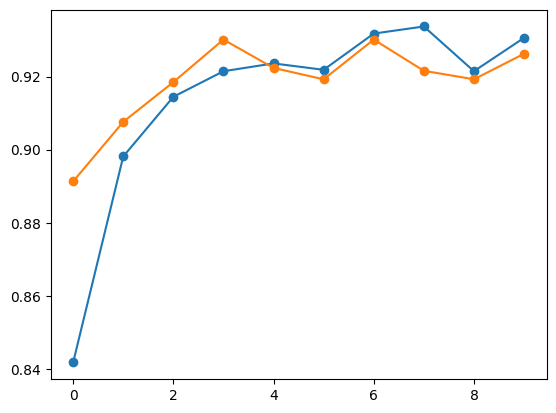

In [22]:

# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', linestyle='-', marker='o')

# Plot validation accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='-', marker='o')


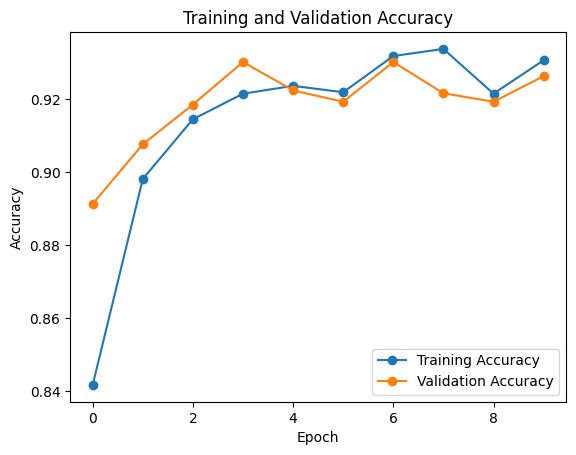

In [23]:

import matplotlib.pyplot as plt

if 'history' in globals():
    # Plot training accuracy
    plt.plot(history.history['accuracy'], label='Training Accuracy', linestyle='-', marker='o')

    # Plot validation accuracy
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='-', marker='o')

    # Add labels and legend
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Show plot
    plt.show()
else:
    print("History variable not found. Please ensure you have trained a model and saved the history object.")


In [25]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('/content/image_prediction_model.h5')

# Evaluate the model on the test data
evaluation_result = loaded_model.evaluate(test_iterator)

# Display overall accuracy
print(f"Overall Accuracy on Test Data: {evaluation_result[1] * 100:.2f}%")


41/41 [==============================] - 15s 349ms/step - loss: 0.2062 - accuracy: 0.9262
Overall Accuracy on Test Data: 92.62%


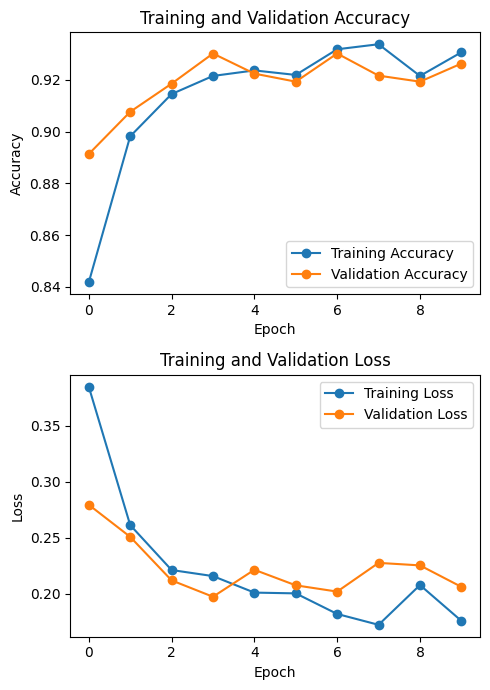

In [31]:
import matplotlib.pyplot as plt

if 'history' in globals():
    # Create subplots
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 7))

    # Plot training accuracy
    axes[0].plot(history.history['accuracy'], label='Training Accuracy', linestyle='-', marker='o')

    # Plot validation accuracy
    axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='-', marker='o')

    # Add labels and legend
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Accuracy')
    axes[0].set_title('Training and Validation Accuracy')
    axes[0].legend()

    # Plot training loss
    axes[1].plot(history.history['loss'], label='Training Loss', linestyle='-', marker='o')

    # Plot validation loss
    axes[1].plot(history.history['val_loss'], label='Validation Loss', linestyle='-', marker='o')

    # Add labels and legend
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Loss')
    axes[1].set_title('Training and Validation Loss')
    axes[1].legend()

    # Adjust layout
    plt.tight_layout()

    # Show plots
    plt.show()
else:
    print("History variable not found. Please ensure you have trained a model and saved the history object.")


In [32]:
from sklearn.metrics import classification_report
import numpy as np

# Predict probabilities for test data
y_pred_prob = loaded_model.predict(test_iterator)

# Get predicted labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Get true labels
y_true = test_iterator.classes

# Print unique classes inferred from y_true
unique_classes = np.unique(y_true)
print("Unique classes:", unique_classes)

# Generate classification report with specified labels
report = classification_report(y_true, y_pred, labels=unique_classes, target_names=class_names)

print("Classification Report:")
print(report)


41/41 [==============================] - 15s 364ms/step
Unique classes: [0 1 2]
Classification Report:
              precision    recall  f1-score   support

   PNEUMONIA       0.95      0.94      0.95       855
     COVID19       0.99      0.85      0.92       116
      NORMAL       0.84      0.91      0.87       317

    accuracy                           0.93      1288
   macro avg       0.93      0.90      0.91      1288
weighted avg       0.93      0.93      0.93      1288



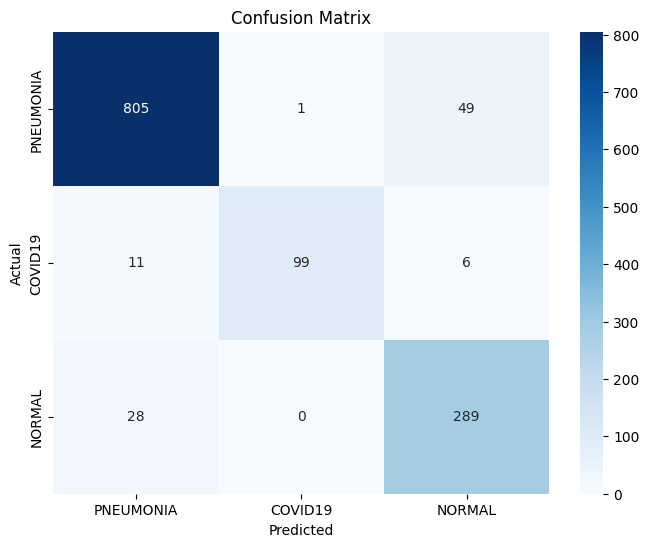

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Saving NORMAL(1272).jpg to NORMAL(1272).jpg
1/1 [==============================] - 0s 26ms/step


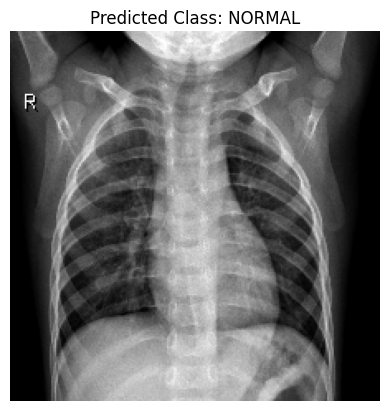

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

# Upload a file from your local machine
uploaded = files.upload()

for filename in uploaded.keys():
    # Load and preprocess the selected image
    img_path = '/content/' + filename
    img = image.load_img(img_path, target_size=image_size)
    img_array = image.img_to_array(img)
    img_array = preprocess_input(img_array[np.newaxis, ...])

# Make predictions
predictions = loaded_model.predict(img_array)

# Get the predicted class label
predicted_class_index = np.argmax(predictions)
predicted_class = class_names[predicted_class_index]

# Display the selected image and predicted class
plt.imshow(img)
plt.title(f'Predicted Class: {predicted_class}')
plt.axis('off')
plt.show()
